# Task 2 : Colour Identification in Images
## Implement an image color detector which identifies all the colours in an image.
By Manish Kumar
### Importing libraries required

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
#from skimage.color import rgb2lab, deltaE_cie76
import os

### Read the sample image

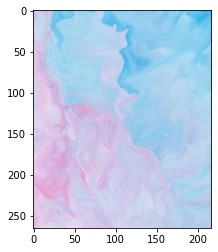

In [15]:
image = cv2.imread('test_image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

### Training our model
KMeans algorithm creates clusters based on the supplied count of clusters.

In [11]:
number_of_colors = 5
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

To define a function that will convert RGB to hex so that we can use them as labels for our pie chart.

In [12]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

### Plot the colours identified

In [13]:
counts = Counter(labels)

center_colors = clf.cluster_centers_

ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

([<matplotlib.patches.Wedge at 0xfc66280>,
 [Text(0.7051592279498314, 0.8442454993881803, '#6ec2ea'),
  Text(-0.7440760802466692, 0.8101547918791523, '#d7bce1'),
  Text(-0.8645481135649286, -0.6801151074129465, '#cbccea'),
  Text(0.22104564606165003, -1.0775615167391548, '#afd1ed'),
  Text(0.9101920276655281, -0.6176977195798239, '#95ceed')])

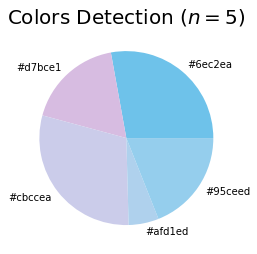

In [14]:
plt.title('Colors Detection ($n=5$)', fontsize=20)
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

Hence, in the pie chart we can look at the colors in our image.